# A famous shopping mall has hired you as an ML engineer. Your task is to create a model that can predict whether the customer will purchase the product from the website or not based on his/her age and estimated salary.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('dataset\\Social_Network_Ads.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
#Featues --- age,estimated salary
#Label ---- Purchased (numeric)(binary)
#Lets confirm whether its binary class label or multiclass label
data.Purchased.unique()
#Since there exist only two values therefore its binary class lavel
#Therefor we can use logistic regression

array([0, 1], dtype=int64)

In [6]:
#Classification
# Features ---- 2d array
# Label ------- 1d array
#This is the requirement from SKLEARN

features = data.iloc[:,[2,3]].values
features


array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [7]:
label = data.iloc[:,4].values
label

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [8]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state =10)

In [9]:
#Create model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train) 

C:\Users\KiranThakur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.640625
0.65


In [11]:
# #Technique to do experimental trail and error to find out best random_state
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression

# for i in range(1,101):
#     X_train, X_test, y_train, y_test = train_test_split(features,label,test_size=0.2,random_state=i)
#     lr = LogisticRegression()
#     lr.fit(X_train, y_train)
#     train_score = lr.score(X_train, y_train)
#     test_score = lr.score(X_test, y_test)
#     if train_score < test_score:
#         print('Train Score:{} Test Score:{} Random Seed : {}'.format(train_score,test_score,i))

In [12]:
model.intercept_

array([-0.00131729])

In [13]:
model.coef_

array([[-3.47799543e-03, -1.18193842e-06]])

In [14]:
#label
model.predict(np.array([[23,87654]]))

array([0], dtype=int64)

In [15]:
#Probability
model.predict_proba(np.array([[23,87654]]))

array([[0.54609693, 0.45390307]])

In [16]:
#Your DataScientist says any entity getting probability of greater than 0.4 ----> label - 1
# You have a privilege to decide the threshold !!!
# 0 to 0.4 ----> 0
# 0.4 to 1 ----> 1

In [17]:
y_predicted_test = model.predict_proba(X_test)
y_predicted_test[0:5]

array([[0.55582111, 0.44417889],
       [0.55327717, 0.44672283],
       [0.56310361, 0.43689639],
       [0.55486178, 0.44513822],
       [0.53445636, 0.46554364]])

In [18]:
y_final_pred = np.where(model.predict_proba(X_test)[:,1] > 0.4, 1, 0) #Conditional Statement in np
y_final_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [19]:
#Applying K-NN Assuming k = 3
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=7,
                             metric='minkowski',
                             p = 2)
model2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [20]:
?KNeighborsClassifier

In [21]:
print(model2.score(X_train,y_train))
print(model2.score(X_test,y_test))

0.84375
0.875


In [22]:
#Confusion Matrix for SocialNetworkAds
# LogisticRegression
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model.predict(X_test))
cm

array([[52,  0],
       [28,  0]], dtype=int64)

In [23]:
data.Purchased.unique()

array([0, 1], dtype=int64)

In [24]:
data.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [25]:
(257)/(257+143)

0.6425

In [26]:
(143) / (257+143)

0.3575

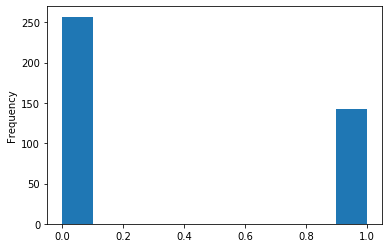

In [27]:
#So dont go for Accuracy !!!!
data.Purchased.plot.hist()

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test,model.predict(X_test))) #logisticRegression

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80



C:\Users\KiranThakur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
print(classification_report(y_test,model2.predict(X_test)))#K-NN

              precision    recall  f1-score   support

           0       0.89      0.92      0.91        52
           1       0.85      0.79      0.81        28

    accuracy                           0.88        80
   macro avg       0.87      0.85      0.86        80
weighted avg       0.87      0.88      0.87        80



In [31]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,model2.predict(X_test)))
print(accuracy_score(y_test,model.predict(X_test)))

0.875
0.65


In [32]:
#Accuracy of above 65% --- Accept !!!! (Balanced Data ---> Accuracy Score)
# (Unbalanced data -- Check either precision or recall has the value greater than accepatble value)

In [33]:
from sklearn.tree import DecisionTreeClassifier
modelClassifier = DecisionTreeClassifier()
modelClassifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [34]:
modelClassifier.score(X_train,y_train)

0.99375

In [35]:
modelClassifier.score(X_test,y_test)

0.8625

In [36]:
from sklearn.ensemble import RandomForestClassifier
modelRandomF = RandomForestClassifier()
modelRandomF.fit(X_train,y_train)

C:\Users\KiranThakur\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
modelRandomF.score(X_train,y_train)

0.978125

In [38]:
modelRandomF.score(X_test,y_test)

0.9